In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

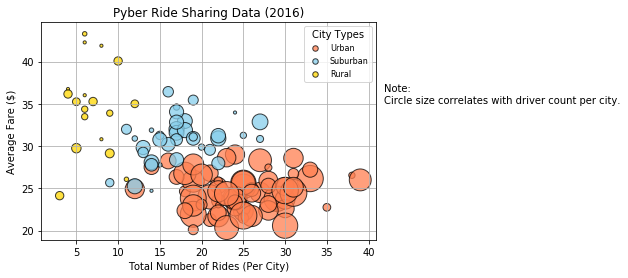

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_group = pyber_df.loc[pyber_df['type'] == "Urban"]
urban_cities = urban_group.groupby('city')
urban_rides = urban_cities['ride_id'].count()
urban_fares = urban_cities['fare'].mean()
urban_drivers = urban_cities['driver_count'].mean()

suburban_group = pyber_df.loc[pyber_df['type'] == "Suburban"]
suburban_cities = suburban_group.groupby('city')
suburban_rides = suburban_cities['ride_id'].count()
suburban_fares = suburban_cities['fare'].mean()
suburban_drivers = suburban_cities['driver_count'].mean()

rural_group = pyber_df.loc[pyber_df['type'] == "Rural"]
rural_cities = rural_group.groupby('city')
rural_rides = rural_cities['ride_id'].count()
rural_fares = rural_cities['fare'].mean()
rural_drivers = rural_cities['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fares, color="Coral", s=urban_drivers*10, alpha=0.75, 
            edgecolors='black', label='Urban')
plt.scatter(suburban_rides, suburban_fares, color="SkyBlue", s=suburban_drivers*10, alpha=0.75, 
            edgecolors='black', label='Suburban')
plt.scatter(rural_rides, rural_fares, color="Gold", s=rural_drivers*10, alpha=0.75, 
            edgecolors='black', label='Rural')

# Incorporate the other graph properties#
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgnd = plt.legend(loc="best",  fontsize=8, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note: \nCircle size correlates with driver count per city."
plt.text(0.92, 0.6, textstr, fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('Pyber_Ride_Sharing_Data.png', bbox_inches="tight")

plt.show()

## Total Fares by City Type

C:\Users\Astee\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


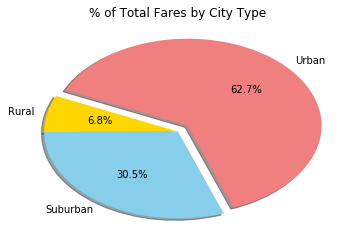

In [3]:
# Calculate Type Percents
total_urban_fares = urban_group['fare'].sum()
total_suburban_fares = suburban_group['fare'].sum()
total_rural_fares = rural_group['fare'].sum()

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [total_urban_fares, total_rural_fares, total_suburban_fares]
colors = ['Lightcoral', 'Gold', 'SkyBlue']
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
       autopct='%1.1f%%', shadow=True, startangle=290)
plt.title('% of Total Fares by City Type')
plt.axes().set_aspect(.65)

# Save Figure
plt.savefig('Pyber_Fares_by_City_Type.png')

plt.show()

## Total Rides by City Type

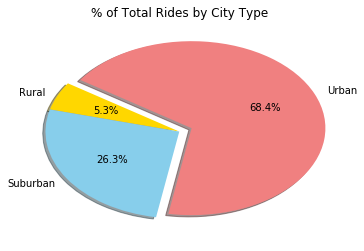

In [4]:
# Calculate Ride Percents
total_urban_rides = urban_group['ride_id'].count()
total_suburban_rides = suburban_group['ride_id'].count()
total_rural_rides = rural_group['ride_id'].count()

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [total_urban_rides, total_rural_rides, total_suburban_rides]
colors = ['Lightcoral', 'Gold', 'SkyBlue']
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
       autopct='%1.1f%%', shadow=True, startangle=260)
plt.title('% of Total Rides by City Type')
plt.axes().set_aspect(.65)

# Save Figure
plt.savefig('Pyber_Rides_by_City_Type.png')

plt.show()

## Total Drivers by City Type

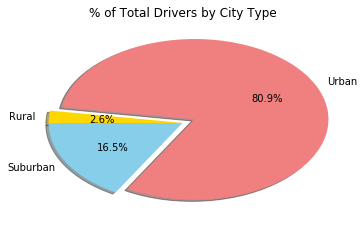

In [5]:
# Calculate Driver Percents
total_urban_drivers = urban_drivers.sum()
total_suburban_drivers = suburban_drivers.sum()
total_rural_drivers = rural_drivers.sum()

# Build Pie Charts
labels = ['Urban', 'Rural', 'Suburban']
sizes = [total_urban_drivers, total_rural_drivers, total_suburban_drivers]
colors = ['Lightcoral', 'Gold', 'SkyBlue']
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
       autopct='%1.1f%%', shadow=True, startangle=240)
plt.title('% of Total Drivers by City Type')
plt.axes().set_aspect(.6)

# Save Figure
plt.savefig('Pyber_Drivers_by_City_Type.png')

plt.show()